## Lesson 5. Tidying data

**Introduction**. Useful data comes from a messy world. If it's collected by humans, it might reflect errors in how people use measuring equipment. Sometimes we encounter data sets with values missing for no apparent reason. Occasionally we will see values that make no sense, given what we know about the context of the data. And sometimes, even when all the measurements are present and accurate, the way the data has been recorded and stored can create headaches for those attempting to analyze it.  

All this is why *cleaning the data*, or *tidying* it, or *data wrangling*, is always part of the data science process. In this lesson, we'll learn two strategies for tidying data: dropping missing values, and removing outliers.

**Caution!** The particular strategies that we use to tidy a data set depend on our goals, the data itself, and what we know about how the data were collected. There is no one-size-fits-all approach to tidying data. The strategies we learn in this lesson may not be appropriate for every data set. As you grow as a data scientist, you will learn more about the considerations that support decisions about preparing a data set.

**Goal**. Drop missing values from a data set. Remove extreme values. Consider when these manipulations may or may not be appropriate.

### Examine the data

In this lesson we'll work with data about baby names in the United States.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

df = pd.read_csv("https://raw.githubusercontent.com/dmoscoe/HCIS/main/csv/babynames.csv")
df.head(10)

,year,sex,name,n,prop,first_letter,first_is_vowel
0,1993.0,M,Reny,5,NaN,R,False
1,1997.0,M,Gerhard,8,NaN,G,False
2,1985.0,F,Dolly,48,NaN,D,False
3,2005.0,F,Chai,7,NaN,C,False
4,1972.0,M,Governor,7,NaN,G,False
5,1986.0,M,Luisangel,5,0.000003,L,False
6,1994.0,F,Gale,5,0.000003,G,False
7,2011.0,F,Kathryne,13,0.000007,K,False
8,2011.0,F,Alayssa,5,0.000003,A,True
9,1888.0,F,Angela,33,0.000174,A,True


`year` is the babies' birth year.  
`sex` is the babies' biological sex.  
`name` is the babies' name.  
`n` is the number of babies with this name recorded by the survey during year `year`\.  
`prop` is the fraction of all babies named `name` in year `year`\.  
`first_letter` is the first letter of `name`\.  
`first_is_vowel` is `True` if the first letter of `name` is a vowel, and `False` otherwise.  

We can use `describe()` to examine some of the descriptive statistics of each numeric column.

In [9]:
df.describe()

,year,n,prop
count,99995.000000,100000.000000,99995.000000
mean,1974.847502,182.505380,0.000142
std,34.115018,1501.239533,0.001223
min,1880.000000,5.000000,0.000002
25%,1951.000000,7.000000,0.000004
50%,1985.000000,12.000000,0.000007
75%,2003.000000,32.000000,0.000023
max,2017.000000,90620.000000,0.075519


1. What is the earliest year in the data set for which we have data? What is the most recent year?

*Sample response*: The earliest year is 1880, and the most recent year is 2017.

2. The data in columns `n` and `prop` are extremely skewed. How can we tell this from the descriptive statistics?

*Sample response*: We can see that the data are skewed because the difference between the min and the first quartile is very small compared to the difference between the third quartile and the max.

3. Based on the descriptive statistics, for which time interval are there more rows in the data frame: 1880 to 1980, or 1980 to 2017?

*Sample response*: The median year is 1985, so half the data set is from 1985 or later. That means more than half the data set is later than 1980. So the interval 1980 to 2017 contains more observations than the interval from 1880 to 1980.

### Missing values

If you closely examined the first few rows of `df` and the `count` row of the descriptive statistics, you may have noticed that some values are missing. For example, the first 5 entries in the `prop` column are `NaN`. `NaN` is a Python symbol standing for "not a number," and it means that some data are missing. We can also see this from the descriptive statistics, which tell us there are 99,995 entries for `prop` and `year`, even though there are 100,000 entries for `n`.

1. What do you think will happen if we attempt to calculate the mean of the values in `prop`? Test your prediction.

*Sample response*: Since some values are missing, I don't think it will be possible to compute a mean.

In [2]:
###Calculate the mean of the values in df['prop']###
#Sample response:
print(st.mean(df['prop']))

nan


2. The descriptive statistics above show a mean value for `prop` of 0.000142. Given your result from prompt 1, how do you think this value was computed?

*Sample response*: I think the rows with missing values were just ignored.

One strategy for dealing with missing data is to simply delete all rows that contain `NaN`. This strategy represents a compromise: on the one hand, dropping all rows with missing values will yield a complete data set. On the other hand, it means we also lose the rest of the information in those rows. 

3. When do you think dropping rows with missing values might be more reasonable? When might it be unreasonable to drop rows with missing values?

*Sample response*: Dropping rows with missing values might be reasonable if we don't think that losing the other information in that row will affect our analysis. Otherwise, we should pursue a different strategy for dealing with missing data.

For our purposes in this unit, we will drop all rows in the data set that contain missing values.

In [4]:
###Drop missing values###
df = df.dropna()
df.describe()

,year,n,prop
count,99986.000000,99986.000000,99986.000000
mean,1974.846499,182.520263,0.000142
std,34.115719,1501.341843,0.001223
min,1880.000000,5.000000,0.000002
25%,1951.000000,7.000000,0.000004
50%,1985.000000,12.000000,0.000007
75%,2003.000000,32.000000,0.000023
max,2017.000000,90620.000000,0.075519


4. The previous output of `df.describe()` showed 5 missing values from `year` and 5 missing values from `prop`. Why isn't `count` equal to 99,990 for each column above?

*Sample response*: There may have been data missing from columns that are not numeric, and so didn't show up in the summary statistics.

5. Now that we've dropped missing values, compute the mean value for `prop` one more time.

In [5]:
#Sample response:
print(st.mean(df['prop']))

0.00014186854309603344


### Extreme values

Let's examine the entries in `n` by plotting a histogram.

6. Plot the default histogram for `df['n']`.

(array([9.964e+04, 2.140e+02, 7.100e+01, 3.100e+01, 1.100e+01, 5.000e+00,
        6.000e+00, 3.000e+00, 2.000e+00, 3.000e+00]),
 array([5.00000e+00, 9.06650e+03, 1.81280e+04, 2.71895e+04, 3.62510e+04,
        4.53125e+04, 5.43740e+04, 6.34355e+04, 7.24970e+04, 8.15585e+04,
        9.06200e+04]),
 <BarContainer object of 10 artists>)

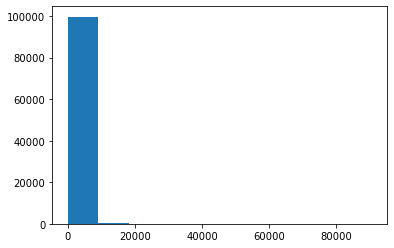

In [6]:
#Sample response
fig, axs = plt.subplots()
axs.hist(df['n'])

If you are looking right now at a strange histogram, you may not have made a mistake-- this data is extremely skewed! A large number of names are given only to a few babies. Here are some of the rarest names in the data set.

In [21]:
df.nsmallest(20, 'n')

,year,sex,name,n,prop,first_letter,first_is_vowel
5,1986.0,M,Luisangel,5,0.000003,L,False
6,1994.0,F,Gale,5,0.000003,G,False
8,2011.0,F,Alayssa,5,0.000003,A,True
14,2010.0,F,Raquell,5,0.000003,R,False
16,1983.0,F,Temeca,5,0.000003,T,False
22,2012.0,F,Hebah,5,0.000003,H,False
23,1984.0,F,Magdalyn,5,0.000003,M,False
28,1892.0,M,Mansfield,5,0.000038,M,False
47,2008.0,M,Vidyuth,5,0.000002,V,False
48,1980.0,F,Aurore,5,0.000003,A,True


In some data sets, measurements with very large or very small values are called *outliers*. Sometimes there is reason to believe that these outliers represent errors in data collection. When this is the case, outliers are sometimes removed from the data set. For the baby names data, we cannot claim that very rare names represent outliers. That's because *most* of the distinct names in the data set are very rare!  

So how can we gain more insight into our data when its shape is so skewed? One strategy is to examine different regions of the data separately.  

We can examine different regions of the data using a technique called *filtering*. We'll assign a new variable name to a subset of our data set based on a certain condition. In the example below, we filter for rare names-- those given to fewer than 100 babies in any given year.

Text(0.5, 1.0, 'A large number of distinct names are given to only a few children each')

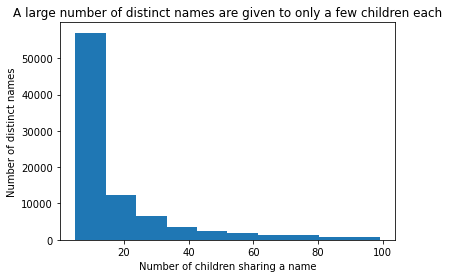

In [7]:
rare_names = df[df['n'] < 100]
fig, axs = plt.subplots()
axs.hist(rare_names['n'])

#Sample response:
axs.set_xlabel("Number of children sharing a name")
axs.set_ylabel("Number of distinct names")
axs.set_title(label = "A large number of distinct names are given to only a few children each")

7. Describe each part of the first line in the code cell above. What are the meanings of the two expressions between brackets?

*Sample response*: The expression in the inner brackets, `'n'`, is the name of the column of `df` that we're filtering by. The expression in the outer brackets, `df['n'] < 100`, is the condition that we want to use as our filter. We'll keep all the rows from `df` for which this condition is true, and drop all the rows for which it is false.

We can filter based on other conditions, too. In the example below, we'll filter to remove all rows with a value for `n` less than 1 standard deviation greater than the mean.

Text(0.5, 1.0, 'A large number of distinct names are given to only a few children each')

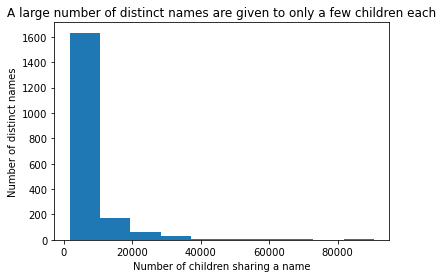

In [8]:
typical_names = df[df['n'] > (st.mean(df['n'] + st.stdev(df['n'])))]
fig, axs = plt.subplots()
axs.hist(typical_names['n'])

#Sample response:
axs.set_xlabel("Number of children sharing a name")
axs.set_ylabel("Number of distinct names")
axs.set_title(label = "A large number of distinct names are given to only a few children each")

### Summary

Tidying our data set sometimes means removing missing values. There may also be times when we want to examine only a subset of our data at a time. We can use filtering to create a new data frame that is a subset of another. This filtering strategy can also be used to remove outliers. Before manipulating a data set, a data scientist should consider the pros and cons of their tidying strategies.

### Discussion questions

8. Add axes labels and titles to the histograms based on `rare_names` and `typical_names`.

9. Compare and contrast the histograms based on `rare_names` and `typical_names`.

*Sample response*: Both histograms show the same overall extreme skewness in the data. The very large majority of distinct names are given to only a few children each. The most popular names are given to tens of thousands of children-- but there are only a few of those names.

10. How else might you filter this data set to learn more about its different subsets?

*Sample response*: We might filter to see if this extreme skewness is evident in all the regions of the data. Or, we might filter for specific years and see if the skewness is more or less extreme at different times.